# Library import and data view

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filePath = 'data/mushrooms.csv'
data = pd.read_csv(filePath)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Exploratoray Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
data.describe().transpose().reset_index().sort_values('unique')

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


In [8]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

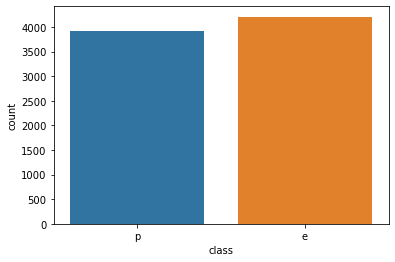

In [14]:
sns.countplot(data=data, x='class')

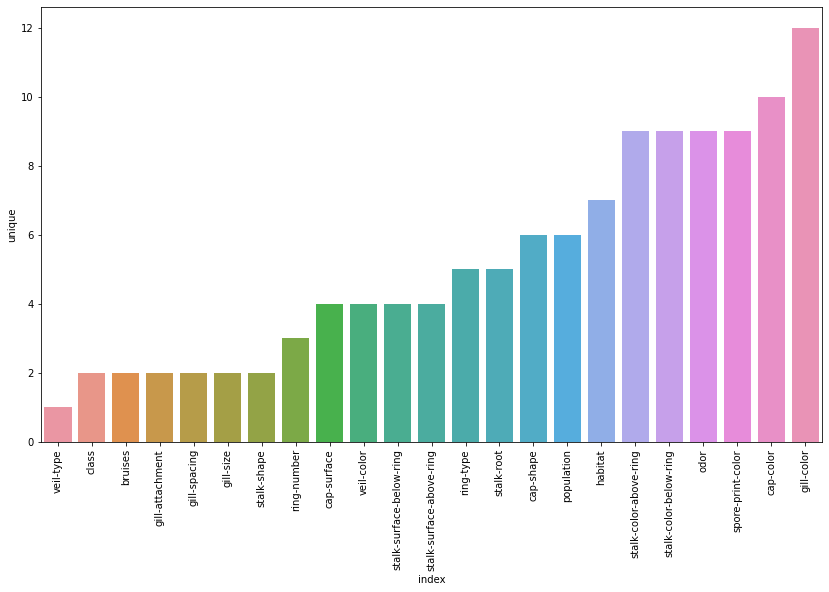

In [20]:
plt.figure(figsize=(14,8))
sns.barplot(data=data.describe().transpose().reset_index().sort_values('unique'), x='index', y='unique')
plt.xticks(rotation=90);

# Data preparation

In [21]:
X = data.drop(['class'], axis=1)
y = data['class']

In [22]:
X = pd.get_dummies(X, drop_first=True)

# TRAIN TEST SPLIT

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

# Gradient Boosting and Grid Search with CV

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {'n_estimators':[1,5,10,15,20,40,100],
             'max_depth':[3,4,5,6]}

In [33]:
gb_model = GradientBoostingClassifier()

In [34]:
grid = GridSearchCV(gb_model, param_grid)

# Fit to training data with CV

In [35]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [1, 5, 10, 15, 20, 40, 100]})

In [36]:
grid.best_params_

{'max_depth': 3, 'n_estimators': 100}

# Performance

In [37]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [39]:
prediction = grid.predict(X_test)

In [40]:
prediction

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [41]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [42]:
feature_imp = grid.best_estimator_.feature_importances_

In [43]:
feature_imp

array([ 2.91150176e-04,  1.57831518e-16,  1.87266806e-17,  0.00000000e+00,
        7.95417283e-17,  1.05030313e-03,  9.31558432e-19,  1.64140847e-17,
        0.00000000e+00,  0.00000000e+00,  2.66898129e-18,  0.00000000e+00,
        1.81778743e-17,  3.60400286e-21,  0.00000000e+00,  6.04605717e-05,
        2.31055039e-03,  5.14863589e-02,  6.24175887e-04,  1.72024174e-02,
        1.82499853e-02,  1.03652846e-04,  6.14762854e-01,  5.61116517e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.29231264e-02,
        1.03950811e-02,  0.00000000e+00,  5.51900122e-17,  2.95763023e-18,
        1.20360078e-17,  0.00000000e+00,  0.00000000e+00,  5.51628853e-17,
        3.11062778e-17,  0.00000000e+00, -7.04365379e-23,  0.00000000e+00,
        0.00000000e+00,  2.92091629e-04,  1.35971991e-01,  3.02822984e-03,
        3.00696199e-02,  2.51047802e-03,  1.43555976e-03,  4.95063766e-06,
        1.83319493e-05,  2.54104494e-03,  3.60689405e-02,  4.48564857e-05,
        0.00000000e+00,  

In [44]:
important_feature = pd.DataFrame(index=X.columns, data=feature_imp, columns=['Importance'])

In [45]:
important_feature

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,1.578315e-16
cap-shape_k,1.872668e-17
cap-shape_s,0.000000e+00
cap-shape_x,7.954173e-17
...,...
habitat_l,0.000000e+00
habitat_m,2.526976e-16
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [46]:
important_feature.sort_values('Importance', ascending=True)

,Importance
gill-color_w,-7.043654e-23
habitat_w,0.000000e+00
stalk-color-above-ring_g,0.000000e+00
odor_y,0.000000e+00
gill-attachment_f,0.000000e+00
...,...
spore-print-color_r,3.049536e-02
stalk-surface-below-ring_y,3.606894e-02
bruises_t,5.148636e-02
stalk-root_c,1.359720e-01


In [47]:
important_feature.describe()

,Importance
count,9.500000e+01
mean,1.052632e-02
std,6.463591e-02
min,-7.043654e-23
25%,0.000000e+00
50%,6.078408e-08
75%,9.243300e-04
max,6.147629e-01


In [56]:
important_feature = important_feature[important_feature['Importance'] > 0.000600]

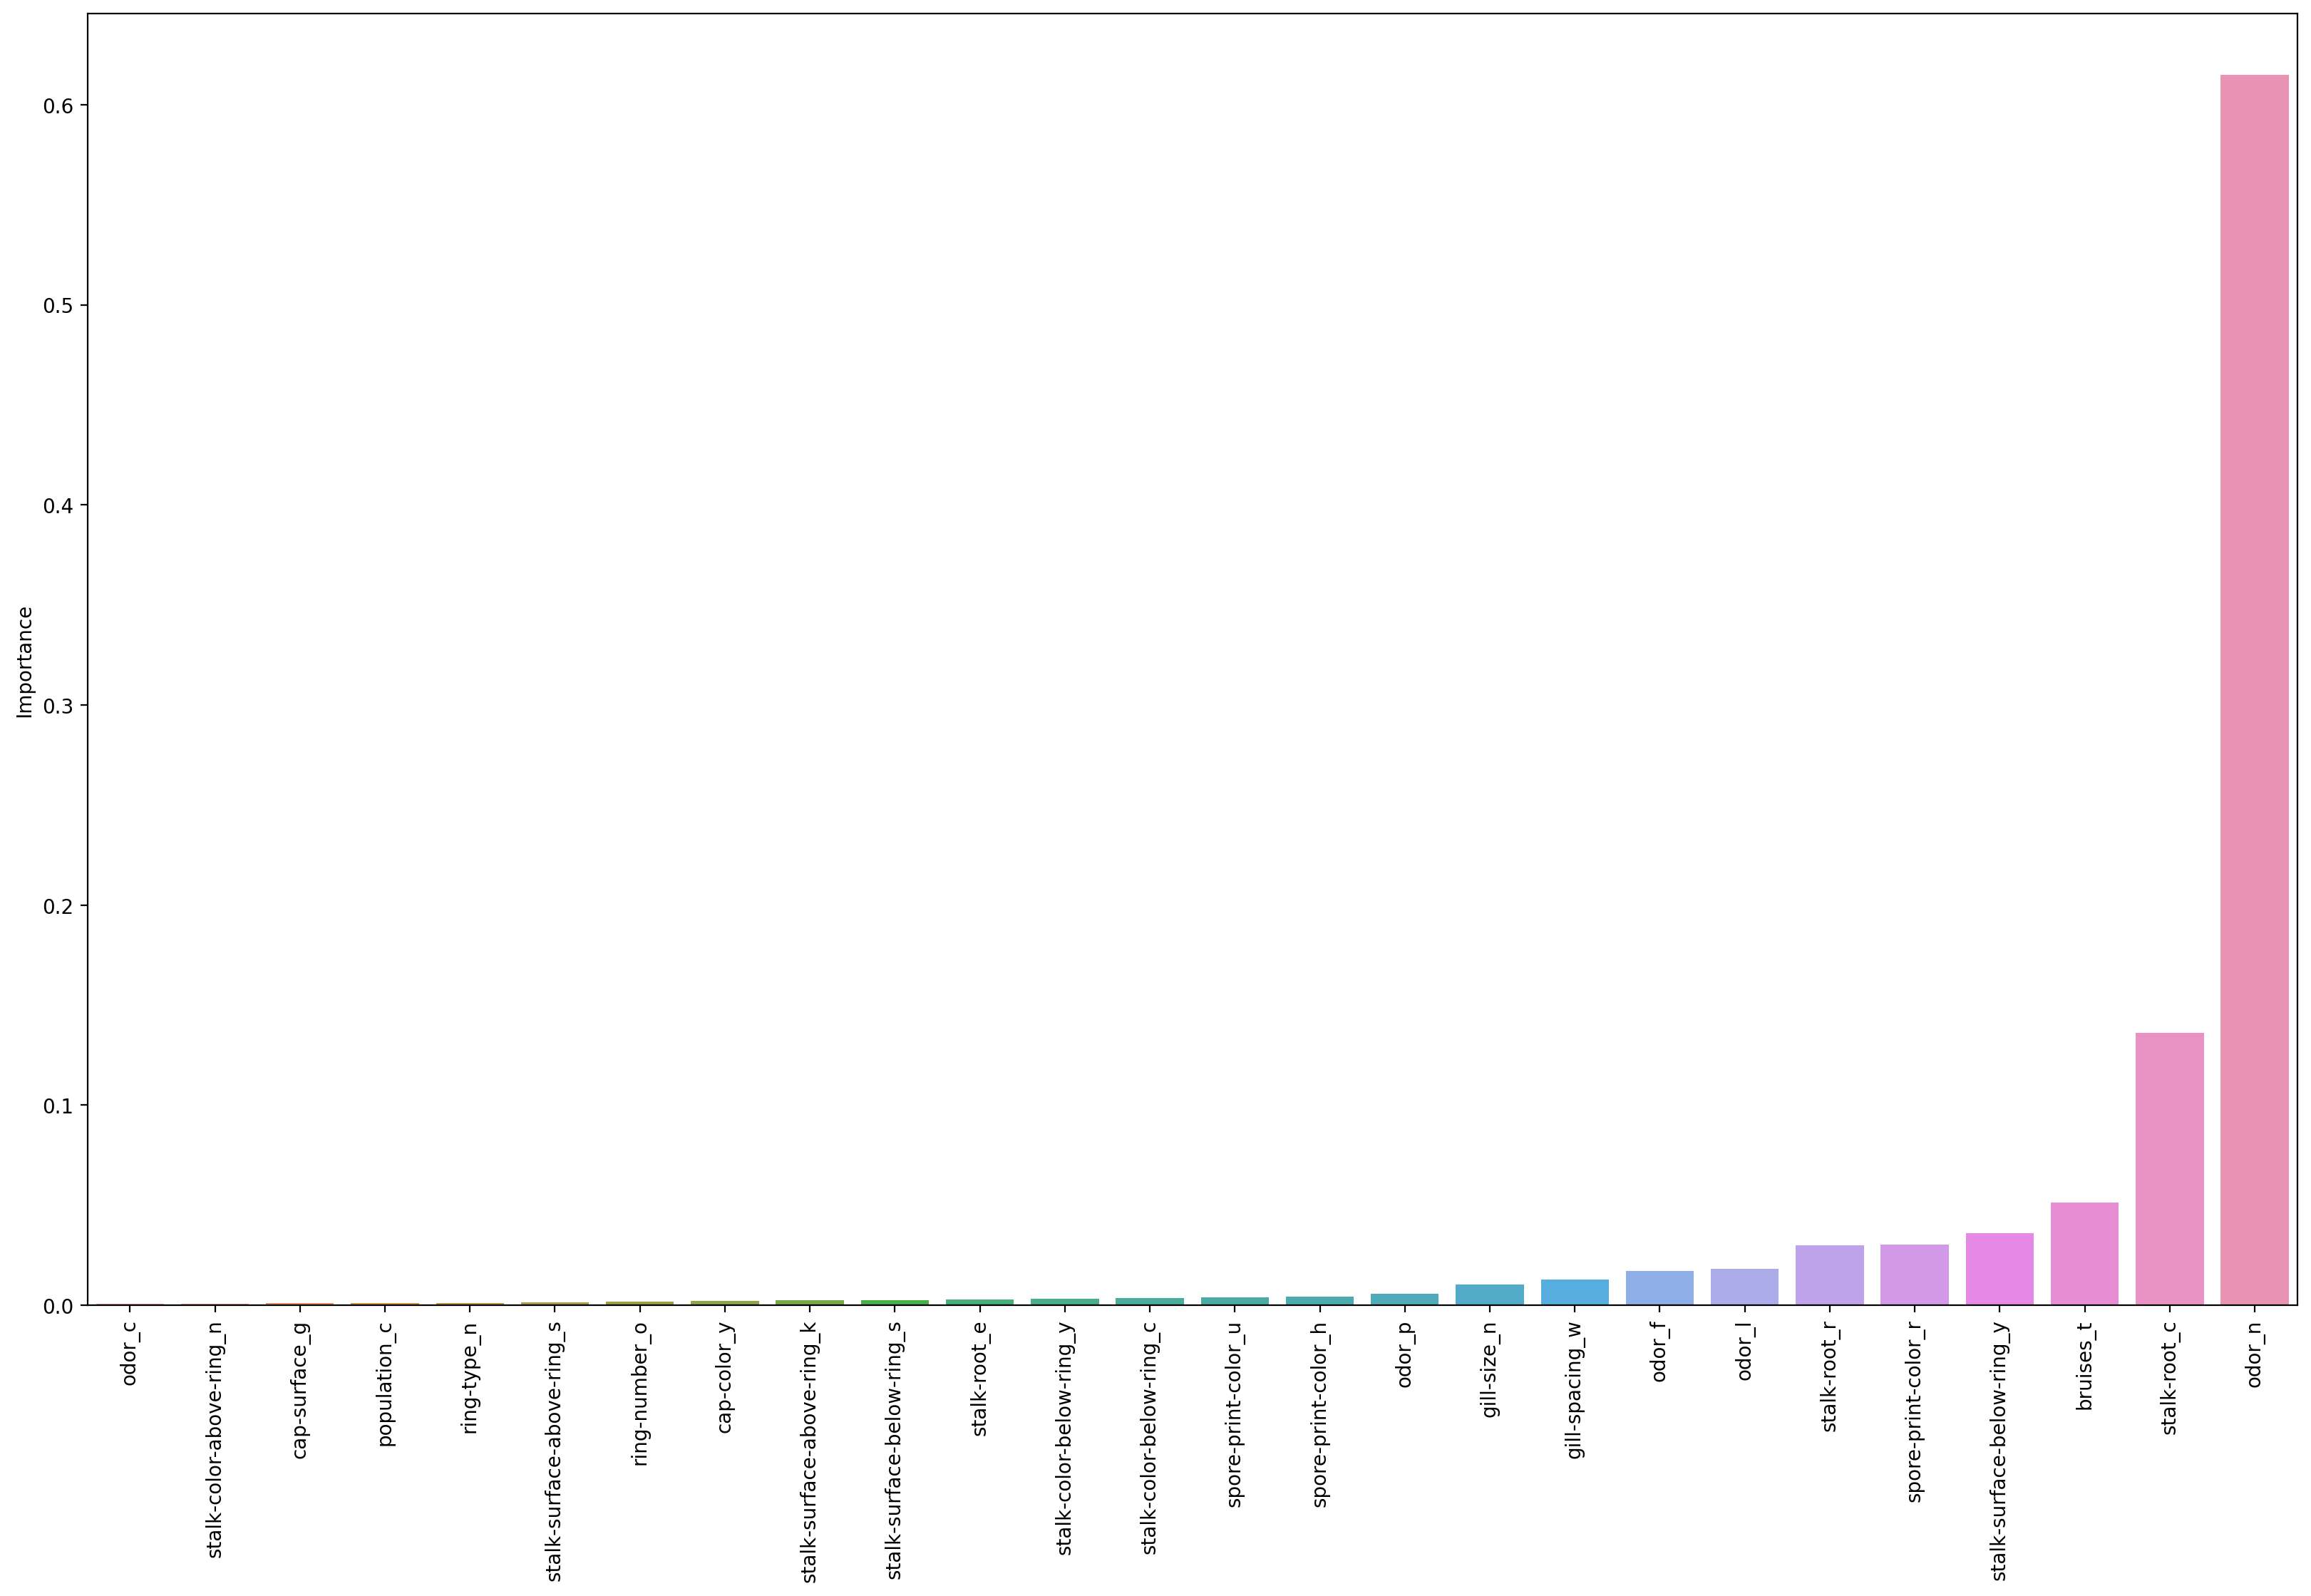

In [57]:
plt.figure(figsize=(20,12), dpi=200)
sns.barplot(data=important_feature.sort_values('Importance'), x=important_feature.sort_values('Importance').index, y='Importance')
plt.xticks(rotation=90);

# THE END